In [17]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(1, 'Z:/grodriguez/CardiacOCT/code/utils')
from postprocessing import create_annotations_lipid, create_annotations_calcium
from counts_utils import create_image_png

In [3]:
#Github image: NLD-ISALA-0093 frame 280
#Red thrombus image: NLD-AMPH-0063 frame 300
#White thrombus: NLD-RADB-0007 frame 273
#Post-processing results: NLD-ISALA-0097 frame 320
#Post-processing calcium: NLD-AMPH-0054 frame 168
#OCT thesis healthy frame: NLD-HMC-0009-RCAd frame 240
#OCT thesis lipid/caclium: NLD-RADB-0082 frame 270, 360
#Others: NLD-AMPH-0028 frame 233 (sidebranch) and frame 164 (dissection)

In [4]:
image1 = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-original\scans-DICOM\NLD-AMPH-0063.dcm')
image_pixel_data1 = sitk.GetArrayFromImage(image1)

In [5]:
image2 = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-original\extra-scans-DICOM\NLD-RADB-0007.dcm')
image_pixel_data2 = sitk.GetArrayFromImage(image2)

In [30]:
image3 = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-original\scans-DICOM\NLD-AMPH-0028.dcm')
image_pixel_data3 = sitk.GetArrayFromImage(image3)

In [33]:
seg = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-original\segmentations-ORIGINALS\NLD-AMPH-0028.nii.gz')
seg_pixel_data = sitk.GetArrayFromImage(seg)

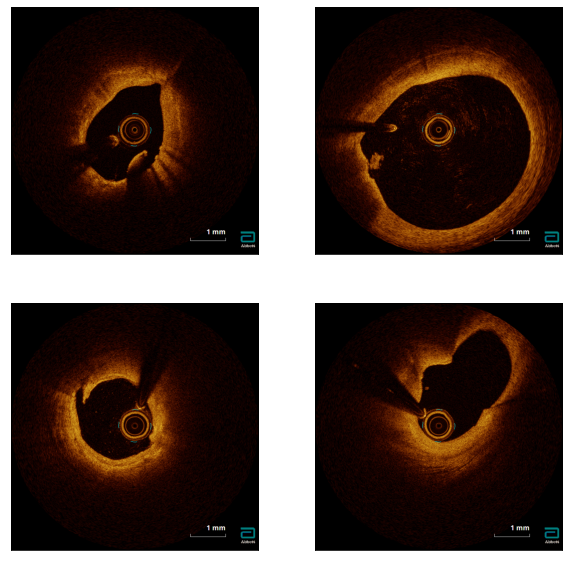

In [42]:
fig, axes = plt.subplots(2,2,figsize=(10,10))

axes = axes.flatten()
frame = 300

axes[0].imshow(image_pixel_data1[300,:,:])
axes[1].imshow(image_pixel_data2[273,:,:,:])
axes[2].imshow(image_pixel_data3[164,:,:])
axes[3].imshow(image_pixel_data3[233,:,:])
axes[0].get_xaxis().set_visible(False)
axes[0].get_yaxis().set_visible(False)
axes[1].get_xaxis().set_visible(False)
axes[1].get_yaxis().set_visible(False)
axes[2].get_xaxis().set_visible(False)
axes[2].get_yaxis().set_visible(False)
axes[3].get_xaxis().set_visible(False)
axes[3].get_yaxis().set_visible(False)

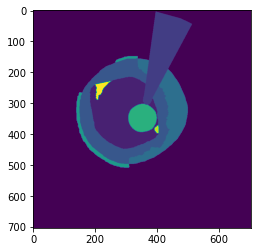

In [34]:
plt.imshow(seg_pixel_data[164,:,:])

## Report

In [ ]:
#Preprocessing: NLD-ISALA-0093 frame 360
#Measurements: NLD-ISALA-0084 frame 350

In [3]:
img = sitk.GetArrayFromImage(sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-original\DICOM\NLD-ISALA-0093.dcm'))
seg = sitk.GetArrayFromImage(sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-original\SEGMENTATIONS\NLD-ISALA-0093.nii.gz'))

In [50]:
img_r = sitk.GetArrayFromImage(sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-2d\nnUNet_raw_data\Task601_CardiacOCT\imagesTr\NLDISALA0093_1_frame360_049_0000.nii.gz'))
img_g = sitk.GetArrayFromImage(sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-2d\nnUNet_raw_data\Task601_CardiacOCT\imagesTr\NLDISALA0093_1_frame360_049_0001.nii.gz'))
img_b = sitk.GetArrayFromImage(sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-2d\nnUNet_raw_data\Task601_CardiacOCT\imagesTr\NLDISALA0093_1_frame360_049_0002.nii.gz'))

seg_pre = sitk.GetArrayFromImage(sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-2d\nnUNet_raw_data\Task601_CardiacOCT\labelsTr\NLDISALA0093_1_frame360_049.nii.gz'))

In [51]:
img_pre = np.stack((img_r[0], img_g[0], img_b[0]), axis=-1)

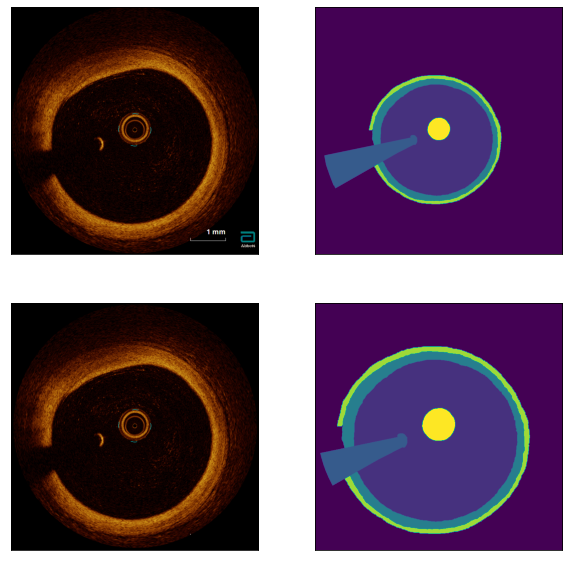

In [62]:
fig, axes = plt.subplots(2,2,figsize=(10,10))

axes = axes.flatten()

frame = 360

axes[0].imshow(img[frame,:,:])
axes[1].imshow(seg[frame,:,:])
axes[2].imshow(img_pre)
axes[3].imshow(seg_pre[0])
axes[0].get_xaxis().set_visible(False)
axes[0].get_yaxis().set_visible(False)
axes[1].get_xaxis().set_visible(False)
axes[1].get_yaxis().set_visible(False)
axes[2].get_xaxis().set_visible(False)
axes[2].get_yaxis().set_visible(False)
axes[3].get_xaxis().set_visible(False)
axes[3].get_yaxis().set_visible(False)

In [14]:
seg = sitk.GetArrayFromImage(sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\preds_second_split\model_rgb_2d_best\NLDISALA0084_1_frame350_041.nii.gz'))[0]

In [18]:
lipid_img_pred, _ , _, _, _ = create_annotations_lipid(seg, font='mine')
calcium_img_pred, _ , _, _, _, _ = create_annotations_calcium(seg, font='mine')

final_seg = create_image_png(seg)

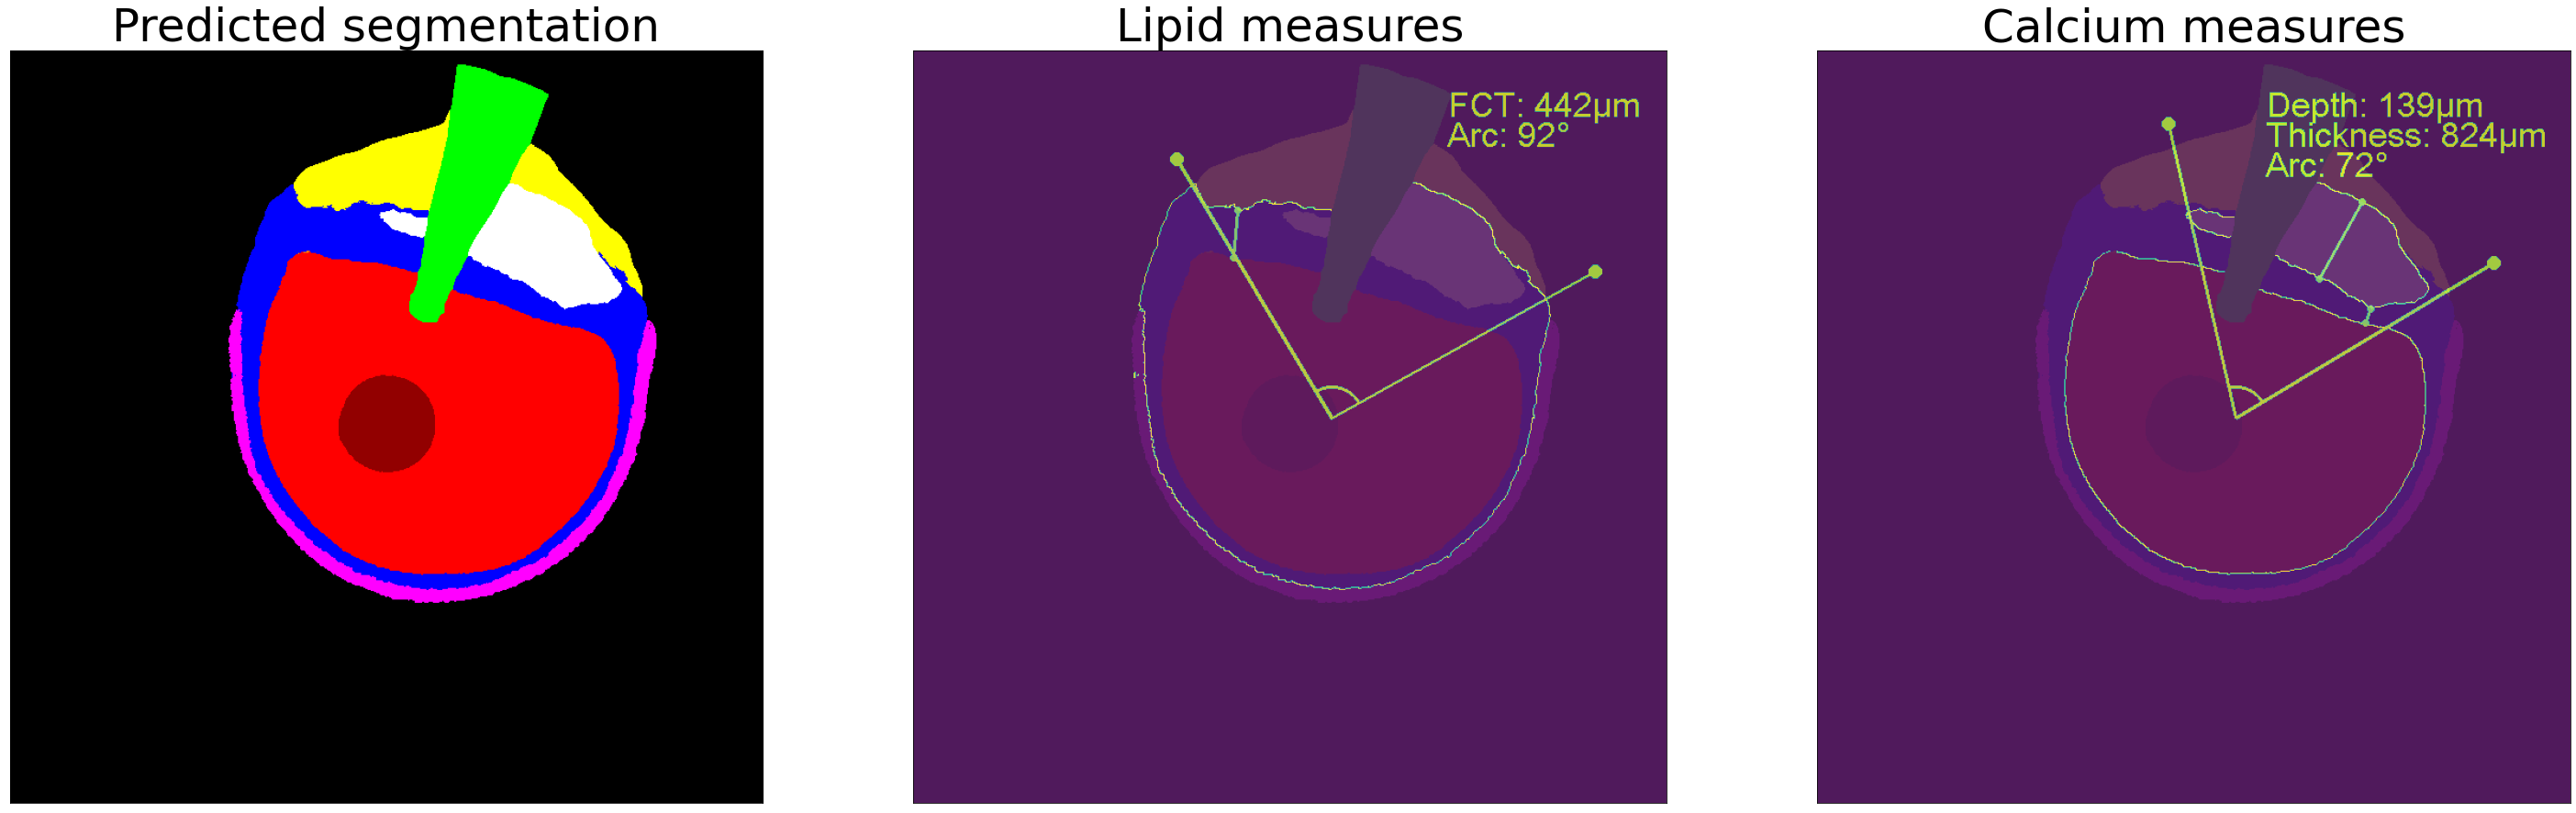

In [22]:
fig, axes = plt.subplots(1,3, figsize=(50,50))

axes[0].set_title('Predicted segmentation', fontsize=50)
axes[0].imshow(final_seg)
axes[0].get_xaxis().set_visible(False)
axes[0].get_yaxis().set_visible(False)

axes[1].set_title('Lipid measures', fontsize=50)
axes[1].imshow(final_seg, alpha=0.5)
axes[1].imshow(lipid_img_pred, alpha=0.8)
axes[1].get_xaxis().set_visible(False)
axes[1].get_yaxis().set_visible(False)

axes[2].set_title('Calcium measures', fontsize=50)
axes[2].imshow(final_seg, alpha=0.5)
axes[2].imshow(calcium_img_pred ,alpha=0.8)
axes[2].get_xaxis().set_visible(False)
axes[2].get_yaxis().set_visible(False)